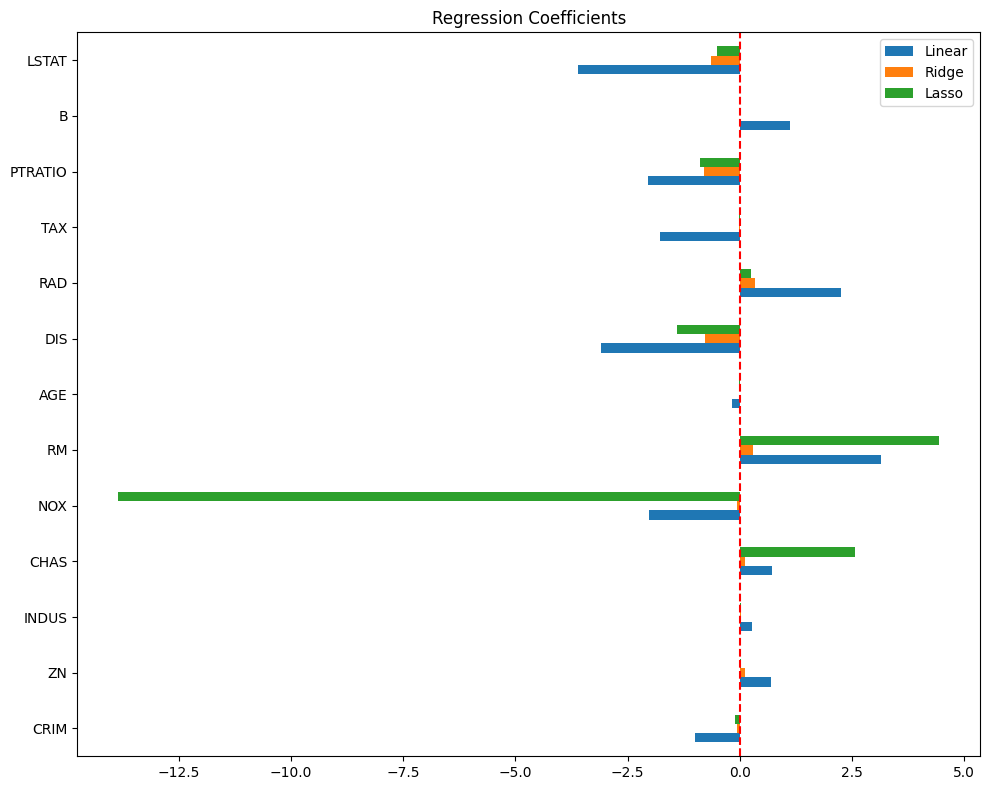

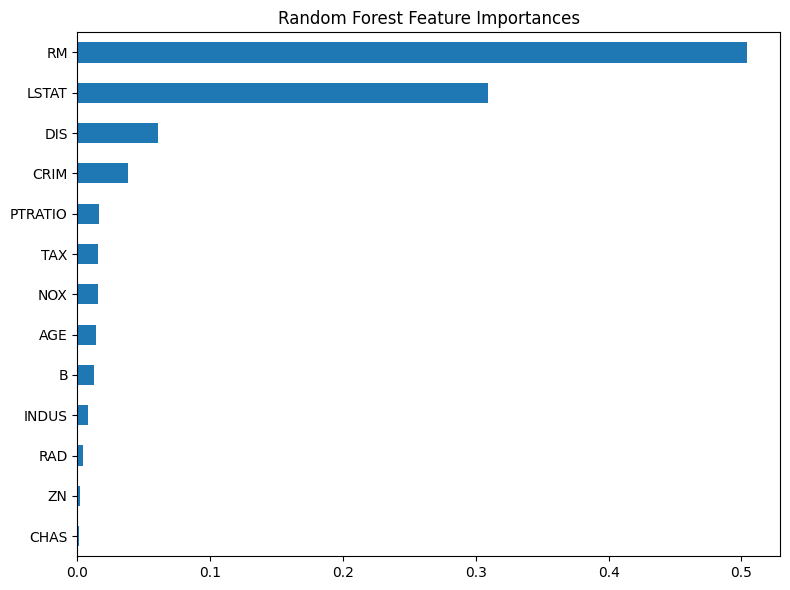

Top 5 features (by absolute value)

Linear:
 LSTAT      3.611658
RM         3.145240
DIS        3.081908
RAD        2.251407
PTRATIO    2.037752
Name: Linear, dtype: float64

Ridge:
 PTRATIO    0.801985
DIS        0.766256
LSTAT      0.644930
RAD        0.340365
RM         0.305964
Name: Ridge, dtype: float64

Lasso:
 NOX        13.839232
RM          4.438317
CHAS        2.570765
DIS         1.396032
PTRATIO     0.877833
Name: Lasso, dtype: float64

RandomForest:
 RM         0.503845
LSTAT      0.309509
DIS        0.060549
CRIM       0.038062
PTRATIO    0.016313
dtype: float64


In [1]:
# 05_feature_analysis.ipynb

import pickle
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load models
with open("linear_model.pkl", "rb") as f:
    linear_model = pickle.load(f)
with open("ridge_model.pkl", "rb") as f:
    ridge_model = pickle.load(f)
with open("lasso_model.pkl", "rb") as f:
    lasso_model = pickle.load(f)
with open("rf_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

# 2. Load train data to get feature names
with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
feature_names = X_train.columns

# 3. Create coefficient DataFrames
coef_df = pd.DataFrame({
    "Linear": linear_model.coef_,
    "Ridge": ridge_model.coef_,
    "Lasso": lasso_model.coef_
}, index=feature_names)

# 4. Feature importances from RandomForest
rf_importances = pd.Series(rf_model.feature_importances_, index=feature_names)

# 5. Plot regression coefficients
coef_df.plot(kind="barh", figsize=(10, 8), title="Regression Coefficients")
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

# 6. Plot Random Forest importances
rf_importances.sort_values().plot(kind='barh', figsize=(8, 6), title="Random Forest Feature Importances")
plt.tight_layout()
plt.show()

# 7. Top 5 features by each model
print("Top 5 features (by absolute value)\n")
print("Linear:\n", coef_df["Linear"].abs().sort_values(ascending=False).head())
print("\nRidge:\n", coef_df["Ridge"].abs().sort_values(ascending=False).head())
print("\nLasso:\n", coef_df["Lasso"].abs().sort_values(ascending=False).head())
print("\nRandomForest:\n", rf_importances.sort_values(ascending=False).head())
